# 4.2.1.2 K-Nearest Neighbors (KNN)

## Explanation of K-Nearest Neighbors and Its Scenarios

**K-Nearest Neighbors (KNN)** is a non-parametric, lazy learning algorithm used for classification and regression tasks. The core idea of KNN is to classify a data point based on the majority class among its 'k' nearest neighbors in the feature space.

### **Key Concepts**:

- **Distance Metric**: The choice of distance metric (e.g., Euclidean, Manhattan, Minkowski) is crucial in determining the 'nearness' of the neighbors. The most commonly used metric is the Euclidean distance.
  $$\text{Euclidean Distance} = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}$$

- **Value of 'k'**: The number of nearest neighbors to consider for classifying a data point. Choosing the right value of 'k' is important; a small 'k' can be sensitive to noise, while a large 'k' can smooth out the classification boundaries.
  
- **Majority Voting**: The class of the new data point is determined by the majority class among its 'k' nearest neighbors. For regression tasks, the output is the average of the 'k' nearest neighbors.

KNN is simple, intuitive, and effective for small to medium-sized datasets, but it can be computationally expensive for large datasets.

## Procedure for Implementing K-Nearest Neighbors

1. **Data Preparation**:
   - Collect and preprocess the data, including handling missing values, encoding categorical variables, and scaling numerical features.
   - Split the data into training and test sets.

2. **Model Training**:
   - Choose the value of 'k' and the distance metric.
   - For each data point in the test set, find the 'k' nearest neighbors from the training set.

3. **Model Prediction**:
   - Use majority voting to determine the class of each test data point.
   - For regression, calculate the average of the 'k' nearest neighbors.

4. **Model Evaluation**:
   - Evaluate the model's performance using metrics such as accuracy, precision, recall, F1-score for classification, and mean squared error (MSE) for regression.

## **Scenarios for KNN:**

- **Noisy Data**: KNN can perform well with noisy data due to its robustness to outliers.
- **Multi-class Classification**: KNN naturally supports multi-class classification tasks.
- **Small to Medium-Sized Datasets**: It is effective when the dataset size is moderate and the number of features is not excessively high.

___
___
### Readings:
- [What is the k-nearest neighbors algorithm?](https://www.ibm.com/topics/knn)
- [Choosing Number of Neighbors (k) for the K-Nearest Neighbors (KNN) Algorithm](https://readmedium.com/en/https:/towardsdatascience.com/choosing-the-right-number-of-neighbors-k-for-the-k-nearest-neighbors-knn-algorithm-fbc635279ec7)
- [K Nearest Neighbours](https://towardsdatascience.com/k-nearest-neighbours-introduction-to-machine-learning-algorithms-18e7ce3d802a)
- [K-Nearest Neighbors Demo](http://vision.stanford.edu/teaching/cs231n-demos/knn/)

### Videos:
- [K Nearest Neighbors | Intuitive explained ](https://www.youtube.com/watch?v=0p0o5cmgLdE)
- [ K-Nearest Neighbors: KNN \[1/6\]](https://www.youtube.com/watch?v=HmunSzYCKtg&t=5s&pp=ygULbWVhbnhhaSBrbm4%3D)

___
___

___

### Implementing KNN using scikit-learn and Testing Different Values of 'k'

In [1]:
# Import necessary libraries
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

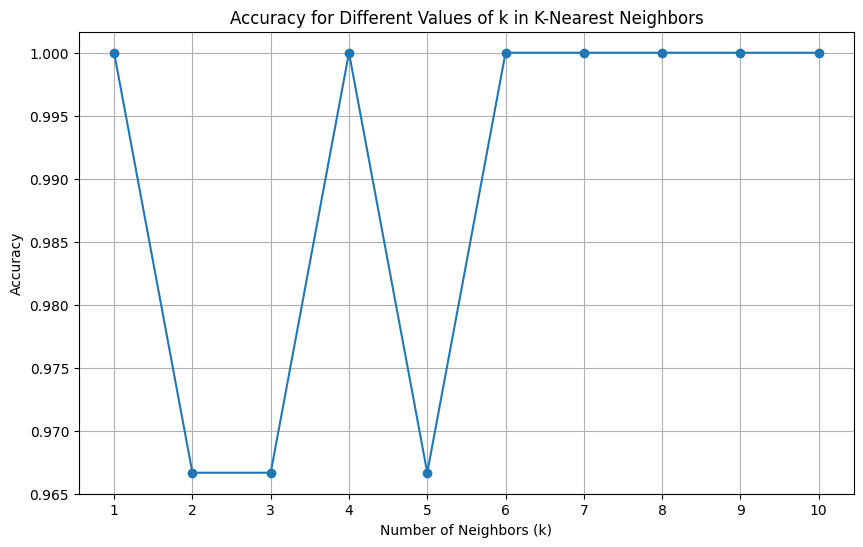

In [3]:
# Testing different values of 'k'
k_values = range(1, 11)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)

# Plotting the accuracy for different values of 'k'
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Values of k in K-Nearest Neighbors')
plt.xticks(k_values)
plt.grid()
plt.show()

In [4]:
# Implementing K-Nearest Neighbors using scikit-learn
knn = KNeighborsClassifier(n_neighbors=5)  # Example: using 'k=5'
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)

# Evaluate the model
accuracy_sklearn = accuracy_score(Y_test, Y_pred)
report=classification_report(Y_test, Y_pred)
print(f'Accuracy (scikit-learn KNN): {accuracy_sklearn:.2f}')
print(f'\nClassification Report (scikit-learn): \n{report}')

Accuracy (scikit-learn KNN): 0.97

Classification Report (scikit-learn): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



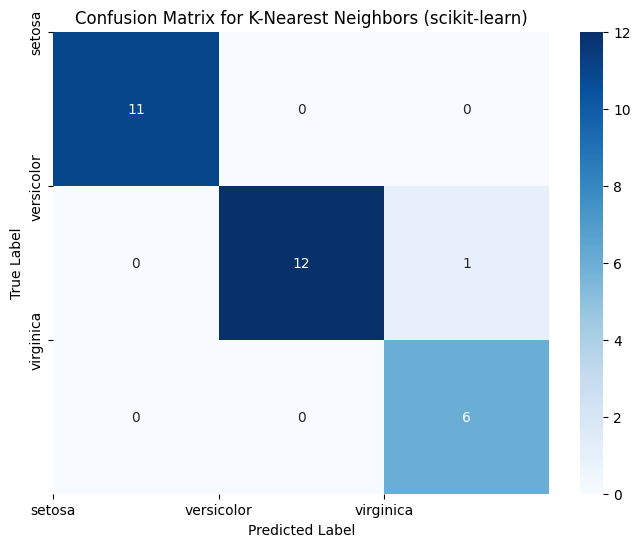

In [5]:
# Plotting confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbors (scikit-learn)')
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

___

### Implementing KNN from Scratch and Testing Different Values of 'k'

In [6]:
# Importing necessary libraries
import numpy as np
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
class KNNClassifier:
    def __init__(self, k=5):
        self.k = k
    
    def fit(self, X, Y):
        self.X_train = X
        self.Y_train = Y
    
    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return np.array(predictions)
    
    def _predict(self, x):
        distances = [self._distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.Y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]
    
    def _distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
        

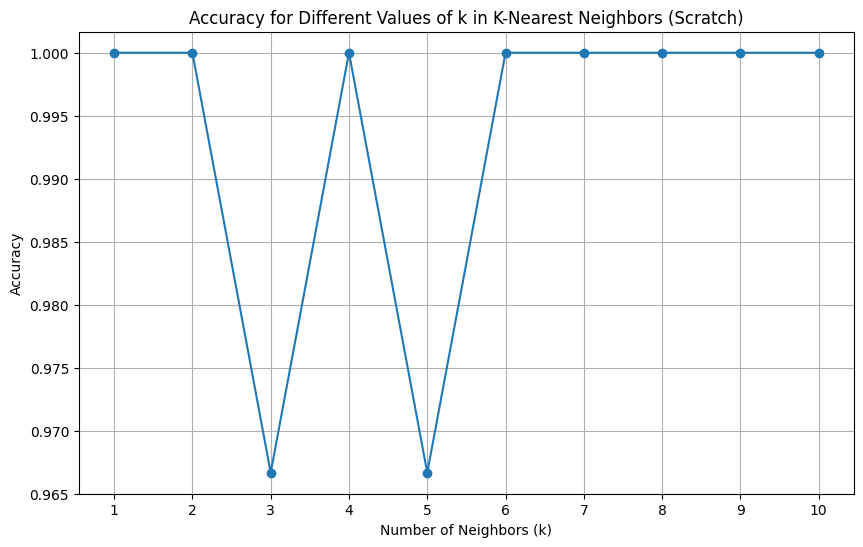

In [8]:
# Generating some random classification data for demonstration
iris = load_iris()
X = iris.data
Y = iris.target
# Splitting the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Testing different values of 'k'
k_values = range(1, 11)
accuracies_scratch = []

for k in k_values:
    knn_scratch = KNNClassifier(k=k)
    knn_scratch.fit(X_train, Y_train)
    Y_pred_scratch = knn_scratch.predict(X_test)
    accuracy_scratch = accuracy_score(Y_test, Y_pred_scratch)
    accuracies_scratch.append(accuracy_scratch)

# Plotting the accuracy for different values of 'k'
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies_scratch, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('Accuracy for Different Values of k in K-Nearest Neighbors (Scratch)')
plt.xticks(k_values)
plt.grid()
plt.show()

In [9]:
# Implementing K-Nearest Neighbors from scratch with the optimal 'k' value
knn_scratch = KNNClassifier(k=6)
knn_scratch.fit(X_train, Y_train)

# Predicting
Y_pred_scratch = knn_scratch.predict(X_test)
# Evaluating the model
accuracy_scratch = accuracy_score(Y_test, Y_pred_scratch)
report_scratch=classification_report(Y_test, Y_pred_scratch)
print(f'Accuracy (scikit-learn KNN): {accuracy_scratch:.2f}')
print(f'Classification Report (scratch): \n{report_scratch}')

Accuracy (scikit-learn KNN): 1.00
Classification Report (scratch): 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



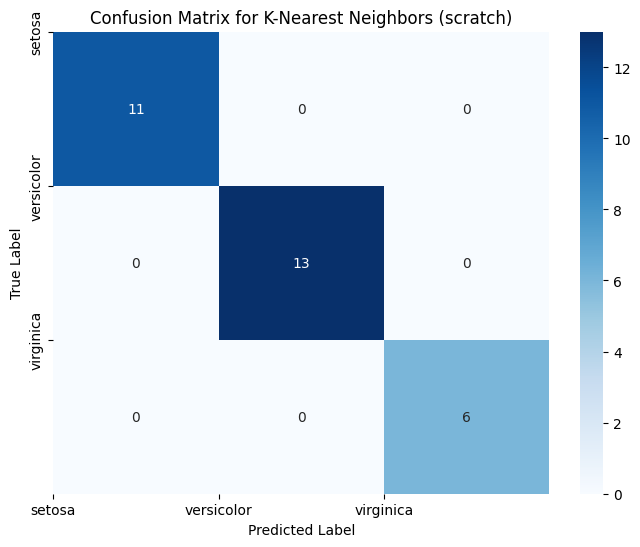

In [10]:
# Plotting confusion matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_scratch)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbors (scratch)')
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names)
plt.yticks(tick_marks, iris.target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Conclusion

K-Nearest Neighbors (KNN) is a versatile and intuitive classification algorithm suitable for various scenarios. Here's a summary of key points:

- **Versatility**: KNN can handle both classification and regression tasks, making it applicable in a wide range of domains.
- **Simple Concept**: The algorithm's simplicity lies in its reliance on proximity to neighboring points for prediction, making it easy to understand and implement.
- **Scalability**: While KNN can be computationally expensive for large datasets due to its lazy learning nature, it performs well on smaller datasets.
- **Parameter Sensitivity**: The choice of $ k $, the number of neighbors, significantly impacts KNN's performance. Too small $ k $ values can lead to overfitting, while too large $ k $ values can lead to underfitting.

In practice, choosing the optimal $ k $ value involves evaluating performance metrics like accuracy, precision, recall, and F1-score on validation data. Additionally, preprocessing steps such as normalization or standardization of features can enhance KNN's performance.

Implementing KNN using `sklearn` allows for efficient experimentation with different $ k $ values and provides robust evaluation metrics to gauge model performance. Understanding the strengths and limitations of KNN is crucial for leveraging it effectively in classification tasks.
